In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import date

sys.path.append('../')

from util.chart_methods import draw_investment_log
from util.math_methods import round_down

In [2]:
df = pd.read_csv('../simulation/test.log', parse_dates=['date'], date_parser=pd.to_datetime)
df.head()

,date,return_rate,balance,benefit,investment_total,total
0,2016-01-04,100.0,400000.0,0.0,0.0,400000.0
1,2016-01-05,100.0,400000.0,0.0,0.0,400000.0
2,2016-01-06,100.0,400000.0,0.0,0.0,400000.0
3,2016-01-07,100.0,400000.0,0.0,0.0,400000.0
4,2016-01-08,100.0,400000.0,0.0,0.0,400000.0


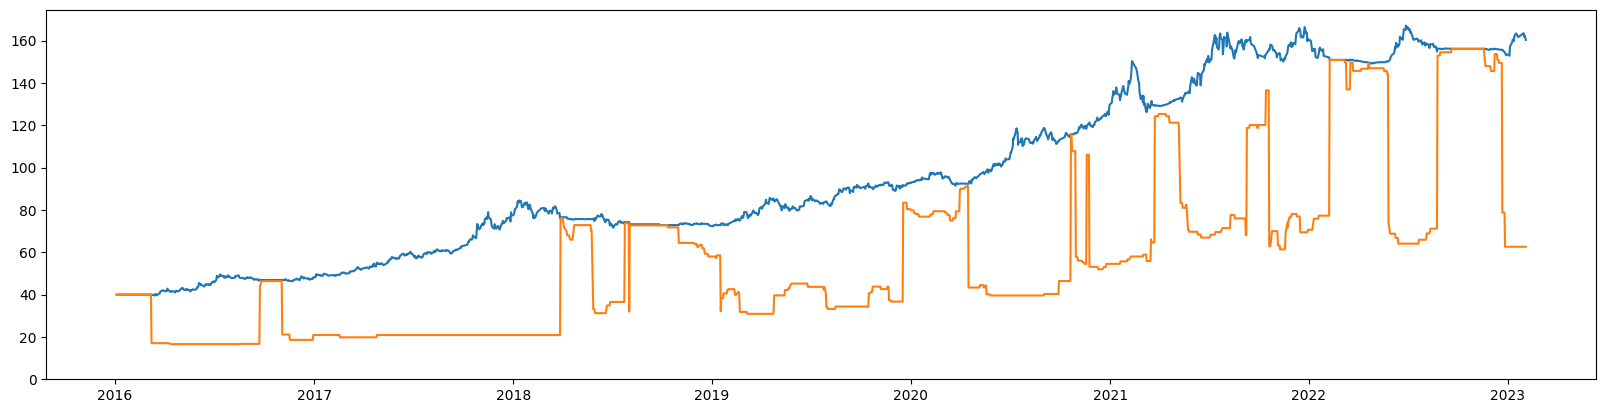

In [3]:
draw_investment_log(df)

In [4]:
start_date = date.fromtimestamp(df.date.values[0].astype(int) / 1e9)
end_date = date.fromtimestamp(df.date.values[-1].astype(int) / 1e9)
years = end_date.year - start_date.year if end_date.year > start_date.year else 1
initial_total = df.total.values[0]
total = df.total.values[-1]
cagr = round_down((total / initial_total) ** (1 / years) - 1)
print('CAGR: {0}'.format(cagr))

CAGR: 0.21
